In [68]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from datetime import datetime
import statsmodels.api as sm

In [41]:
# Read data


df1=pd.read_csv("/content/hungary_chickenpox.csv")[:471]
print(df1)
print(df1.shape)
print(df1[df1.isnull().any(axis=1)])
df1["Date"] = pd.to_datetime(df1["Date"], format='%d/%m/%Y')


           Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
0      3/1/2005       168       79    30    173     169        42    136   
1     10/1/2005       157       60    30     92     200        53     51   
2    17/01/2005        96       44    31     86      93        30     93   
3    24/01/2005       163       49    43    126      46        39     52   
4    31/01/2005       122       78    53     87     103        34     95   
..          ...       ...      ...   ...    ...     ...       ...    ...   
466   9/12/2013        63       30    30     11      81        16     38   
467  16/12/2013        59       44    35     23      84        59     37   
468  23/12/2013         6        3     0      0       3         0      1   
469  30/12/2013        26       27     1      1      49         0     37   
470    6/1/2014       150       49     4      4     205        48     47   

     GYOR  HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  \
0     12

In [3]:
df2=pd.read_csv("/content/hungary_chickenpox.csv")[472:]
print(df2)
print(df2.shape)
print(df2[df2.isnull().any(axis=1)])
df2["Date"] = pd.to_datetime(df2["Date"], format='%d/%m/%Y')
#df1['BUDAPEST']=df1.BUDAPEST.rolling(7,win_type = 'boxcar').mean()

           Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
472  20/01/2014        82       19    72     13      40        12     44   
473  27/01/2014        58       24    41     24      76        67     24   
474    3/2/2014        84       43    14     14      66        47     28   
475   10/2/2014        59       31     1     26      76        77     18   
476  17/02/2014        60       29    72     21     114        73     71   
477  24/02/2014       116       40    36     30     104        56     23   
478    3/3/2014        99       53    51     41     103        61     78   
479   10/3/2014       112       48    77     20     121         1     25   
480  17/03/2014       197       49    21     50     134       112     34   
481  24/03/2014       116       60    34     58     185        54     54   
482  31/03/2014       215       51    68     54      72       144     46   
483    7/4/2014        82       21   157     26     109        61     41   
484  14/04/2

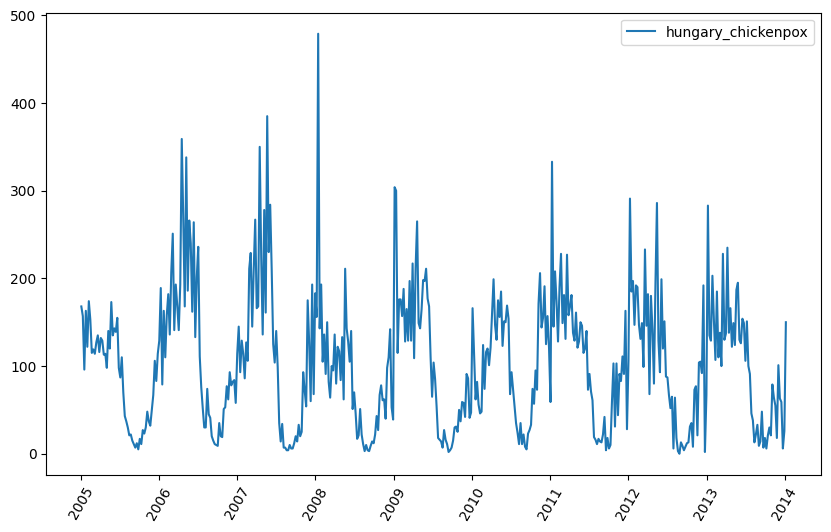

In [4]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot original sales data
plt.plot(df1['Date'], df1['BUDAPEST'], label="hungary_chickenpox")
# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

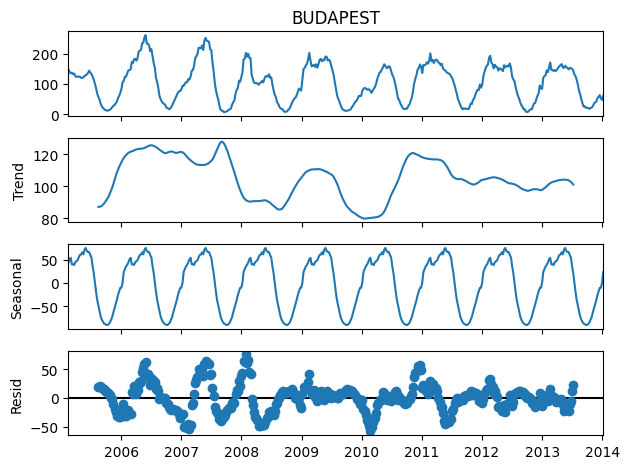

In [6]:
#from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df1['BUDAPEST']=df1.BUDAPEST.rolling(7,win_type = 'boxcar').mean()
df1 = df1.dropna()

df_hun_DC=df1.set_index('Date')
#df1.index.freq = 'W'

# model{"additive", "multiplicative"}
decomposed_data = seasonal_decompose(df_hun_DC.BUDAPEST, model='additive')

# Plot decomposed data
decomposed_data.plot()

# Display the plot
plt.show()

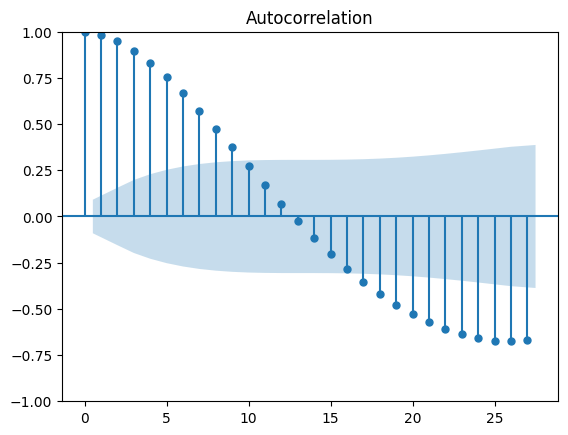

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot using statsmodels function

plot_acf(df_hun_DC.BUDAPEST)
plt.show()

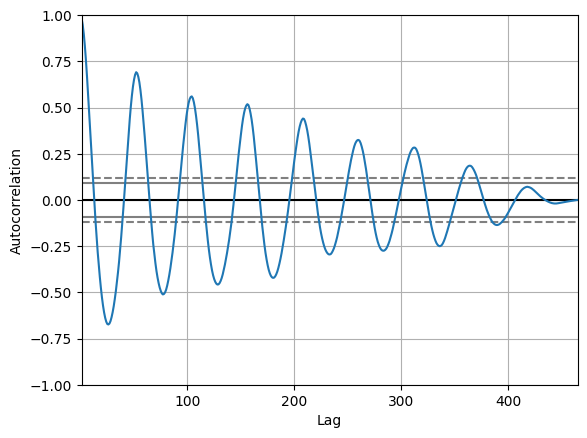

In [8]:
from pandas.plotting import autocorrelation_plot
# Plot using pandas function

autocorrelation_plot(df_hun_DC.BUDAPEST)
plt.show()

In [9]:
X_train = df1.iloc[:, 0].values
y_train = df1.iloc[:, 1].values

X_test = df2.iloc[:, 0].values  # Features for testing
y_test = df2.iloc[:, 1].values   # Target variable for testing (if available)
print(y_test)

[ 82  58  84  59  60 116  99 112 197 116 215  82 155  80  13  70 391 178
 124 235  88 187 140 111  72  75  44  40  37  10   6   7   5  10  11  16
  20  17  21  34  28  44  33  85  16  95  43  35  30 259]


In [84]:
data=df1.iloc[:,1:21]
#data['Year'] = pd.to_datetime(data['Year'].astype(str), format='%Y')
# data=data.set_index('Year')
print(data)

     BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  HAJDU  \
0         168       79    30    173     169        42    136   120    162   
1         157       60    30     92     200        53     51    70     84   
2          96       44    31     86      93        30     93    84    191   
3         163       49    43    126      46        39     52   114    107   
4         122       78    53     87     103        34     95   131    172   
..        ...      ...   ...    ...     ...       ...    ...   ...    ...   
466        63       30    30     11      81        16     38    40     37   
467        59       44    35     23      84        59     37    42     19   
468         6        3     0      0       3         0      1     0      3   
469        26       27     1      1      49         0     37    43     29   
470       150       49     4      4     205        48     47    81    112   

     HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0 

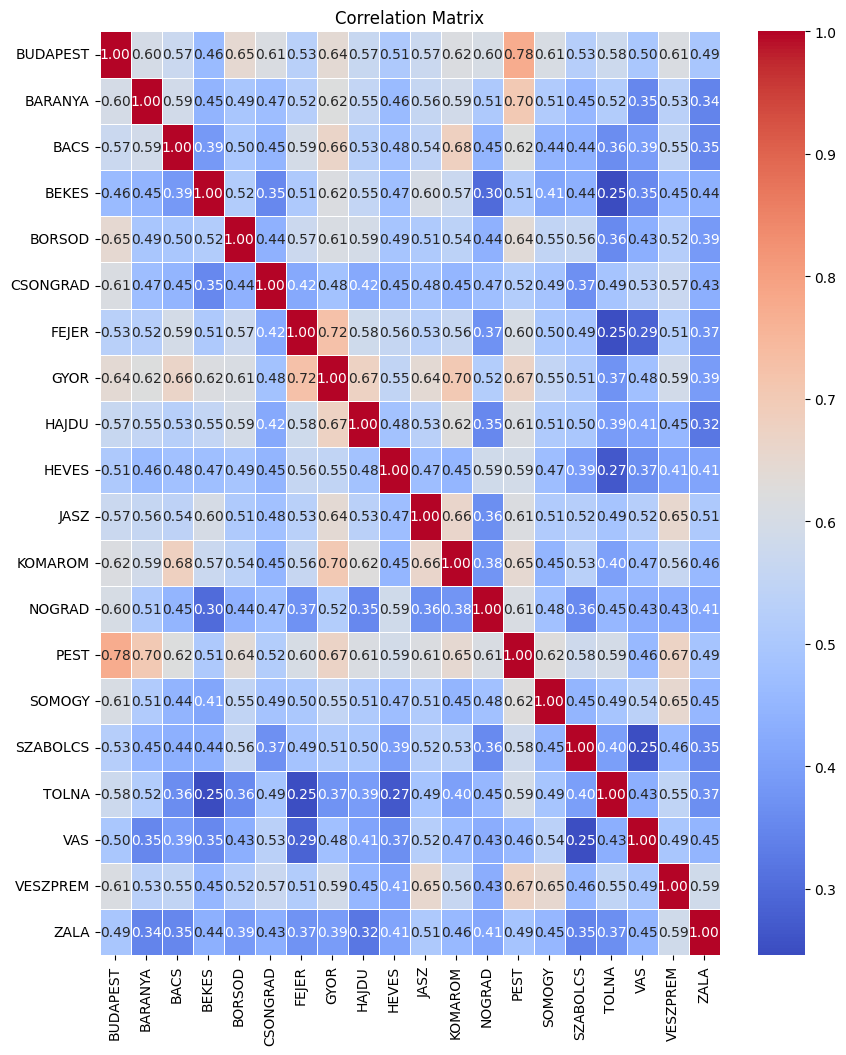

In [43]:
corr=data.corr()

# Plot Heatmap on correlation matrix
#sb.heatmap(corr, annot=True, cmap='YlGnBu')

#plt.show()
# Create the correlation matrix heatmap
plt.figure(figsize=(10, 12))
sb.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

In [46]:
import statsmodels.api as sm
#data1=data.iloc[:,0:22]
#data['Year'] = pd.to_datetime(data['Year'].astype(str), format='%Y')
# data=data.set_index('Year')

X = data.iloc[:, 1:21]
print(X)
X = sm.add_constant(X)
y = data.iloc[:, 0]
print(y)
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

     BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  HAJDU  HEVES  JASZ  \
0         79    30    173     169        42    136   120    162     36   130   
1         60    30     92     200        53     51    70     84     28    80   
2         44    31     86      93        30     93    84    191     51    64   
3         49    43    126      46        39     52   114    107     42    63   
4         78    53     87     103        34     95   131    172     40    61   
..       ...   ...    ...     ...       ...    ...   ...    ...    ...   ...   
466       30    30     11      81        16     38    40     37     21    12   
467       44    35     23      84        59     37    42     19     82     4   
468        3     0      0       3         0      1     0      3      1     0   
469       27     1      1      49         0     37    43     29     18    18   
470       49     4      4     205        48     47    81    112     22    27   

     KOMAROM  NOGRAD  PEST  SOMOGY  SZA

In [47]:
Z0=data.iloc[:,0].diff()
Z0=Z0[1:].values

# Forward difference
data_diff=pd.DataFrame(data.iloc[1:471,:])

data_diff['Diff']=Z0
data_diff

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Diff
1,157,60,30,92,200,53,51,70,84,28,...,50,29,141,48,29,58,53,68,26,-11.0
2,96,44,31,86,93,30,93,84,191,51,...,46,4,157,33,33,24,18,62,44,-61.0
3,163,49,43,126,46,39,52,114,107,42,...,54,14,107,66,50,25,21,43,31,67.0
4,122,78,53,87,103,34,95,131,172,40,...,49,11,124,63,56,7,47,85,60,-41.0
5,174,76,77,152,189,26,74,181,157,44,...,97,26,146,59,54,27,54,48,60,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,63,30,30,11,81,16,38,40,37,21,...,11,6,29,5,18,0,44,11,2,-38.0
467,59,44,35,23,84,59,37,42,19,82,...,2,22,54,17,19,1,19,39,4,-4.0
468,6,3,0,0,3,0,1,0,3,1,...,0,0,10,0,3,4,0,2,2,-53.0
469,26,27,1,1,49,0,37,43,29,18,...,2,13,30,21,26,0,20,23,5,20.0


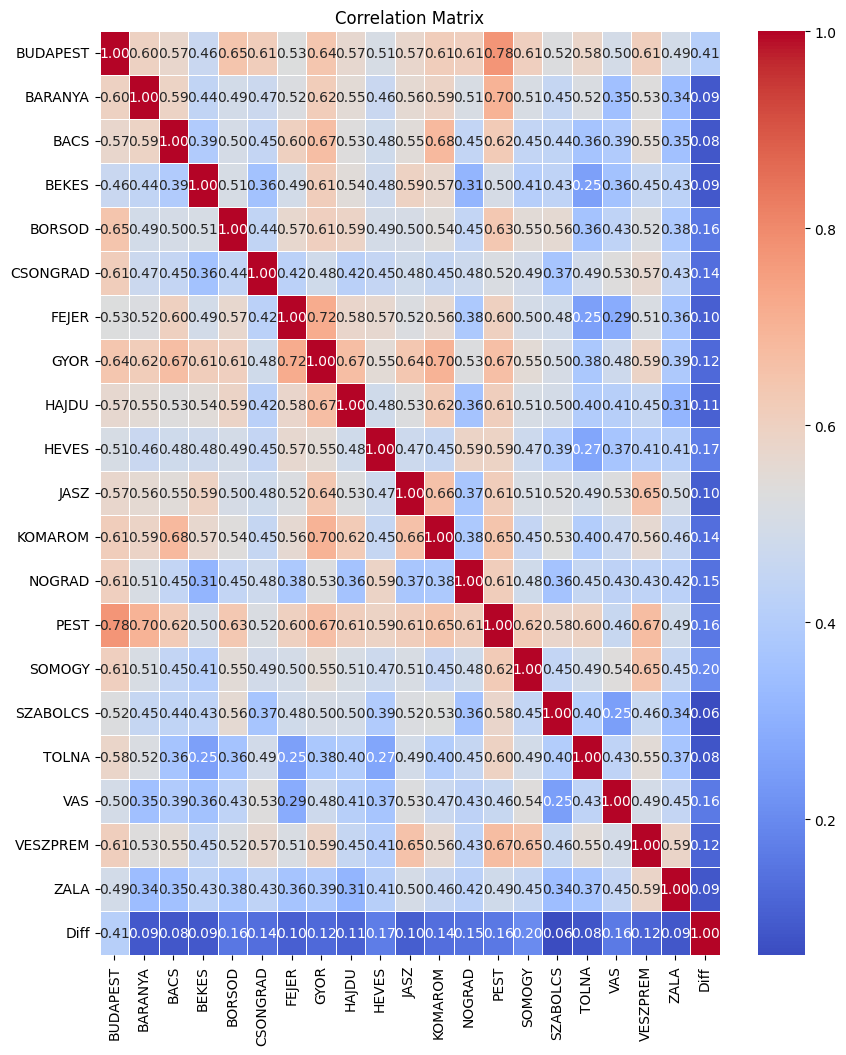

In [89]:
#corr=data_diff.corr()

# Plot Heatmap on correlation matrix
#sb.heatmap(corr, annot=True, cmap='YlGnBu')

#plt.show()
corr=data_diff.corr()

# Plot Heatmap on correlation matrix
#sb.heatmap(corr, annot=True, cmap='YlGnBu')

#plt.show()
# Create the correlation matrix heatmap
plt.figure(figsize=(10, 12))
sb.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

In [51]:
X = data_diff.iloc[:, 0:20]
print(X)
X = sm.add_constant(X)
y = data_diff.iloc[:, 20]
print(y)
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

     BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  HAJDU  \
1         157       60    30     92     200        53     51    70     84   
2          96       44    31     86      93        30     93    84    191   
3         163       49    43    126      46        39     52   114    107   
4         122       78    53     87     103        34     95   131    172   
5         174       76    77    152     189        26     74   181    157   
..        ...      ...   ...    ...     ...       ...    ...   ...    ...   
466        63       30    30     11      81        16     38    40     37   
467        59       44    35     23      84        59     37    42     19   
468         6        3     0      0       3         0      1     0      3   
469        26       27     1      1      49         0     37    43     29   
470       150       49     4      4     205        48     47    81    112   

     HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
1 

In [52]:
Z2=data.iloc[:,0]
Z2=Z2[:470].values

# Forward difference
data_EM=pd.DataFrame(data.iloc[1:471,:])

data_EM['Shift']=Z2
data_EM

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Shift
1,157,60,30,92,200,53,51,70,84,28,...,50,29,141,48,29,58,53,68,26,168
2,96,44,31,86,93,30,93,84,191,51,...,46,4,157,33,33,24,18,62,44,157
3,163,49,43,126,46,39,52,114,107,42,...,54,14,107,66,50,25,21,43,31,96
4,122,78,53,87,103,34,95,131,172,40,...,49,11,124,63,56,7,47,85,60,163
5,174,76,77,152,189,26,74,181,157,44,...,97,26,146,59,54,27,54,48,60,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,63,30,30,11,81,16,38,40,37,21,...,11,6,29,5,18,0,44,11,2,101
467,59,44,35,23,84,59,37,42,19,82,...,2,22,54,17,19,1,19,39,4,63
468,6,3,0,0,3,0,1,0,3,1,...,0,0,10,0,3,4,0,2,2,59
469,26,27,1,1,49,0,37,43,29,18,...,2,13,30,21,26,0,20,23,5,6


In [53]:
X = data_EM.iloc[:, 0:20]
print(X)
X = sm.add_constant(X)
y = data_EM.iloc[:, 20]
print(y)
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

     BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  HAJDU  \
1         157       60    30     92     200        53     51    70     84   
2          96       44    31     86      93        30     93    84    191   
3         163       49    43    126      46        39     52   114    107   
4         122       78    53     87     103        34     95   131    172   
5         174       76    77    152     189        26     74   181    157   
..        ...      ...   ...    ...     ...       ...    ...   ...    ...   
466        63       30    30     11      81        16     38    40     37   
467        59       44    35     23      84        59     37    42     19   
468         6        3     0      0       3         0      1     0      3   
469        26       27     1      1      49         0     37    43     29   
470       150       49     4      4     205        48     47    81    112   

     HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
1 

Vector autoregression model (VAR)

In [55]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
print(data.iloc[:, 0:20])
model = VAR(data.iloc[:, 0:20])

for i in [1,2,3,4]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic) # Akaike Information Criterion
    print('BIC : ', result.bic) # Bayesian information criterion
    print('FPE : ', result.fpe) # Akaike's Final Prediction Error
    print('HQIC: ', result.hqic, '\n') # Hannan–Quinn information criterion

     BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  HAJDU  \
0         168       79    30    173     169        42    136   120    162   
1         157       60    30     92     200        53     51    70     84   
2          96       44    31     86      93        30     93    84    191   
3         163       49    43    126      46        39     52   114    107   
4         122       78    53     87     103        34     95   131    172   
..        ...      ...   ...    ...     ...       ...    ...   ...    ...   
466        63       30    30     11      81        16     38    40     37   
467        59       44    35     23      84        59     37    42     19   
468         6        3     0      0       3         0      1     0      3   
469        26       27     1      1      49         0     37    43     29   
470       150       49     4      4     205        48     47    81    112   

     HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0 

In [56]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Oct, 2023
Time:                     01:00:27
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                    126.207
Nobs:                     470.000    HQIC:                   123.956
Log likelihood:          -41704.6    FPE:                1.58466e+53
AIC:                      122.496    Det(Omega_mle):     6.61096e+52
--------------------------------------------------------------------
Results for equation BUDAPEST
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              20.997656         4.254382            4.936           0.000
L1.BUDAPEST         0.161958         0.058597            2.764           0.006
L1.BARANYA         -0.088689         0.110375           -0.804   

In [85]:
data1=df2.iloc[:,1:21]
#data['Year'] = pd.to_datetime(data['Year'].astype(str), format='%Y')
# data=data.set_index('Year')
#print(data1)

In [95]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
#print(data1.iloc[:, 0:20])
model = VAR(data1.iloc[:, 0:20])

for i in [1]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic) # Akaike Information Criterion
    print('BIC : ', result.bic) # Bayesian information criterion
    print('FPE : ', result.fpe) # Akaike's Final Prediction Error
    print('HQIC: ', result.hqic, '\n') # Hannan–Quinn information criterion

Lag Order = 1
AIC :  98.34954858893431
BIC :  114.56515114416825
FPE :  1.6842950104271439e+43
HQIC:  104.50172557987526 



In [96]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Oct, 2023
Time:                     04:34:16
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                    114.565
Nobs:                     49.0000    HQIC:                   104.502
Log likelihood:          -3380.12    FPE:                1.68430e+43
AIC:                      98.3495    Det(Omega_mle):     1.34394e+40
--------------------------------------------------------------------
Results for equation BUDAPEST
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              15.901951        15.913012            0.999           0.318
L1.BUDAPEST         0.232628         0.302906            0.768           0.442
L1.BARANYA          2.743744         1.056672            2.597   